<div style="text-align: center;">

## Escuela Politécnica Nacional

</div>

**Integrantes:** 

 Kevin Gómez

 Dany Molina 

<div style="text-align: center;">

## Taller 2- Ejericio 1

</div>


Raíces encontradas:
x ≈ -152.00000
x ≈ -136.00000
x ≈ -126.00001


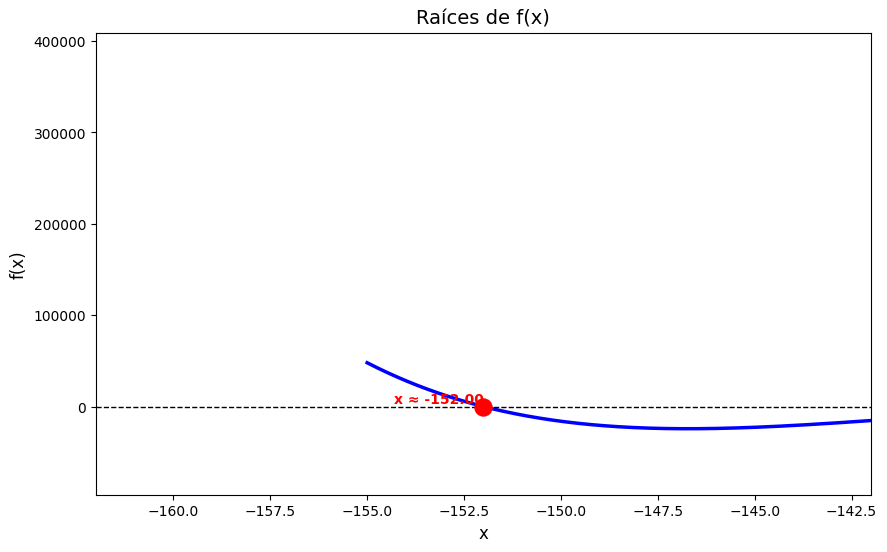

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Definir la función f(x)
def f(x):
    return (x**4) + (540 * x**3) + (109124 * x**2) + (9781632 * x) + 328188672

# Derivada de f(x)
def df(x):
    return (4 * x**3) + (1620 * x**2) + (218248 * x) + 9781632

# Método de Newton-Raphson
def newton_metodo(f, df, x0, tol=1e-5, max_iter=100):
    x = x0
    for _ in range(max_iter):
        derivada = df(x)
        if derivada == 0:
            return None
        x_new = x - f(x) / derivada
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Buscar todas las raíces en un intervalo
def encontrar_todas_las_raices(f, df, a, b, paso=5, tol=1e-5):
    raices = []
    x = a
    while x < b:
        raiz = newton_metodo(f, df, x + paso / 2, tol)
        if raiz is not None:
            if not any(np.isclose(raiz, r, atol=tol) for r in raices):
                raices.append(raiz)
        x += paso
    return raices

# Intervalo para buscar raíces
a = -300
b = 100

# Hallar raices
raices = encontrar_todas_las_raices(f, df, a, b)
raices = sorted(raices)

print("Raíces encontradas:")
for r in raices:
    print(f"x ≈ {r:.5f}")

# Animar la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Rango más ajustado para visualizar bien la curva
x_vals = np.linspace(-155, -115, 5000)

y_vals = f(x_vals)

# Función de animación
def animar(i):
    ax.clear()
    y_vals_local = f(x_vals)

    # Graficar la curva
    ax.plot(x_vals, y_vals_local, label="f(x)", color="blue", linewidth=2.5)
    ax.axhline(0, color="black", linestyle="--", linewidth=1)

    # Centrar el eje Y alrededor de las raíces si se han detectado
    if i >= 0:
        rx = raices[i]
        # Tomar una pequeña ventana de x alrededor de la raíz
        x_window = np.linspace(rx - 10, rx + 10, 2000)
        y_window = f(x_window)
        ymin = np.min(y_window)
        ymax = np.max(y_window)
        padding = (ymax - ymin) * 0.2
        ax.set_xlim(rx - 10, rx + 10)
        ax.set_ylim(ymin - padding, ymax + padding)

    # Etiquetas
    ax.set_title("Raíces de f(x)", fontsize=14)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("f(x)", fontsize=12)

    # Dibujar raíz con énfasis
    rx = raices[i]
    ry = f(rx)
    ax.scatter(rx, ry, color='red', s=150, zorder=5)
    ax.text(rx, ry, f"x ≈ {rx:.2f}", color="red", fontsize=10,
            ha='right', va='bottom', fontweight='bold')

# Crear la animación
ani = animation.FuncAnimation(fig, animar, frames=len(raices), interval=1000, repeat=False)

# Guardar la animación como GIF
ani.save("animacion_raices.gif", writer='pillow', fps=1)

# Mostrar en Jupyter
HTML(ani.to_jshtml())
